EDA

In [17]:
import pandas as pd 

In [18]:
df=pd.read_csv("../data/loan.csv")

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df.shape

(614, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

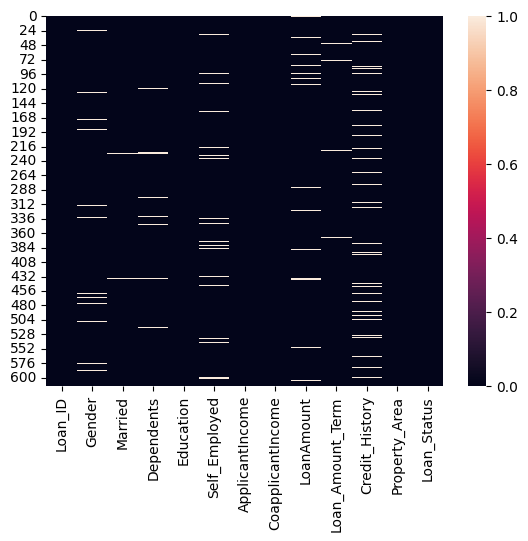

In [24]:
import seaborn as sns
sns.heatmap(df.isnull())


In [25]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df.drop("Loan_ID", axis=1, inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)



In [26]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

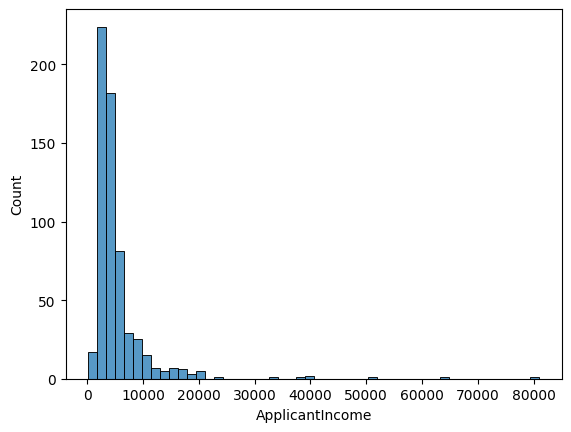

In [33]:
sns.histplot(df["ApplicantIncome"])

In [34]:
df["Education"].value_counts()


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [36]:
pd.crosstab(df["Gender"], df["Loan_Status"], normalize="index") * 100

Loan_Status,N,Y
Gender,,
Female,33.035714,66.964286
Male,30.876494,69.123506


In [ ]:
pd.crosstab(df["Gender"], df["Loan_Status"], normalize="index") * 10



Loan_Status,N,Y
Gender,,
Female,33.035714,66.964286
Male,30.876494,69.123506


In [46]:
pd.crosstab(df["Property_Area"], df["Loan_Status"], normalize="index") * 100


Loan_Status,N,Y
Property_Area,,
Rural,38.547486,61.452514
Semiurban,23.175966,76.824034
Urban,34.158416,65.841584


correaltions

<Axes: >

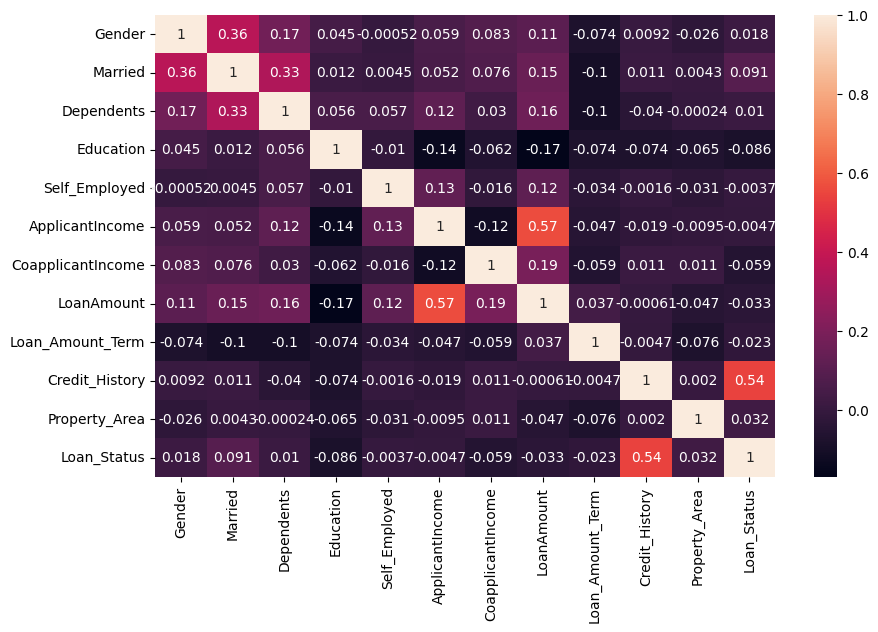

In [ ]:
df_encoded = df.copy()

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_encoded.select_dtypes(include="object"):
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True)

loan status highly depend on credit history


Outliars

<Axes: ylabel='LoanAmount'>

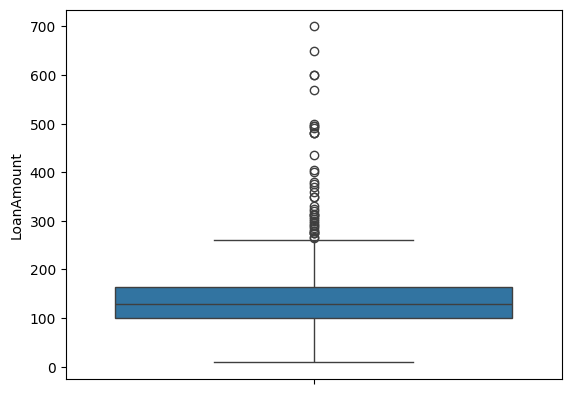

In [51]:
sns.boxplot(df["LoanAmount"])

<Axes: ylabel='ApplicantIncome'>

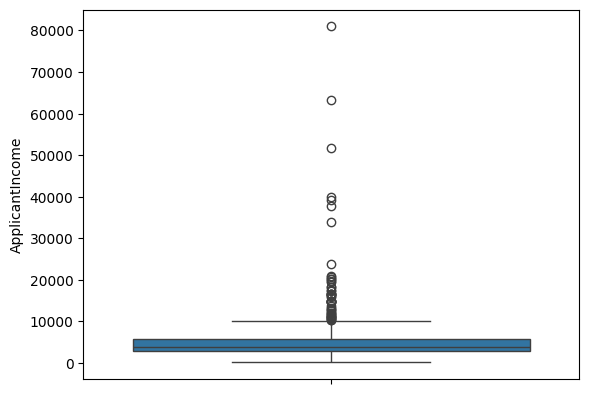

In [52]:
sns.boxplot(df["ApplicantIncome"])

In [53]:
def count_outliers_iqr(column):
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return len(outliers)


In [54]:
print("ApplicantIncome outliers:", count_outliers_iqr(df["ApplicantIncome"]))
print("CoapplicantIncome outliers:", count_outliers_iqr(df["CoapplicantIncome"]))
print("LoanAmount outliers:", count_outliers_iqr(df["LoanAmount"]))

ApplicantIncome outliers: 50
CoapplicantIncome outliers: 18
LoanAmount outliers: 41


Although outliers were detected using the IQR method, they were retained because income and loan amount naturally vary across applicants and represent valid financial behavior. Random Forest is robust to such variations.
